# <b style='color:red;'>Build a multiple linear regression model for the prediction of demand for shared bikes</b>


- Problem Statement : Due to the ongoing corona pandemic in the US, the revenues of bike-sharing company BoomBikes have taken a hit. The company is now struggling to maintain its operations due to the current market conditions. It has therefore decided to create a business plan to boost its sales once the situation improves.
To understand the demand for its services, BoomBikes is currently working on developing a demand model that can analyze the various factors that affect its business. The company is planning on responding to the needs of its customers once the COVID-19 pandemic ends.
To gain a deeper understanding of the demand for its services, the company has contracted a consulting firm to analyze the factors that affect its business.

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Through the collected data, the company has been able to identify the daily bike demands in the US.

- Goal: The demand model must be created with the help of independent variables. It can be used by the business to determine the exact demands that the company encounters, as well as the ways in which it can meet those demands. In addition, it can help management understand the dynamics of the new market.

- Data Preparation: In the data dictionary, you can see that certain variables, such as "weathersit" and "season," have numerical values ranging from 1, 2, and 3 to 4, which correspond to labels. These values might indicate that there's an order to them, but it's not the case.
- Before starting the model development process, it's important that the feature values are converted into a set of categorical string values. This will help the business understand the various independent variables.

- Model Bulding:The data dictionary shows three main variable types: "casual," "registered," and "cnt." The former indicates the number of casual users who made a reservation, while the latter shows the total number who booked a bike on a given day, both registered and casual. The model should then build a representation of this variable in the form of "cnt," which indicates the overall bike rental count.

- Model Evaluation: After you've finished building the model and made predictions on its test set, you can refer to the following code to calculate the R squared score.

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

The y_test and y_pred variables represent the test data sets for the target variable and the predicted values, respectively.
You must perform this step to ensure that the R-Squared score is consistent with the test set's results. The variable names in the function r2_score can also be customized based on the ones you've selected.



# <b style='color:red;'> Understanding the data </b>


In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# Reading the csv file 'application_data.csv' using 'read_csv'
data=pd.read_csv("/Users/uttam/Downloads/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the null value and their data structures
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check the cells and columns of the data set
data.shape

(730, 16)

Note: The data types presented in the data dictionary are not in proper formal notation. This can cause issues when creating the model since the various columns, such as the month, year, and season, are not in binary encoding. Even if you want to visualize the data, you need to use object formal instead of int64. There are two additional columns in the data dictionary called "isntant" and "dteday." These are not used for any purpose, and the data has already been extracted.

In [6]:
# Drop 'instant' and dteday column as 'instant' does not serve any purpose and dteday column vital informations have been extracted
data.drop(['instant'],axis=1,inplace=True)
data.drop(['dteday'],axis=1,inplace=True)

In [7]:
# Replace season binary numbers into meaningful categories. This would change the dtype to object too.
data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [8]:
# Change column 'yr' columns sub-variables from 0 and 1 to more meaningful names.This would change the dtype to object too.
data['yr'].replace({0:'2018',1:'2019'},inplace=True)

In [9]:
# Change the month encoding to meaningful categories. This would change the dtype to object too.
data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [10]:
# Change column 'holiday' into meaninfgul names. This would change the dtype to object too.
data['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)

In [11]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
data['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [12]:
# Change column 'workingday' sub-variable into more meaninfgul name. This would change the dtype to object too.
data['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)

In [13]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
data['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

# <b style='color:red;'> Exploratory data analysis </b>

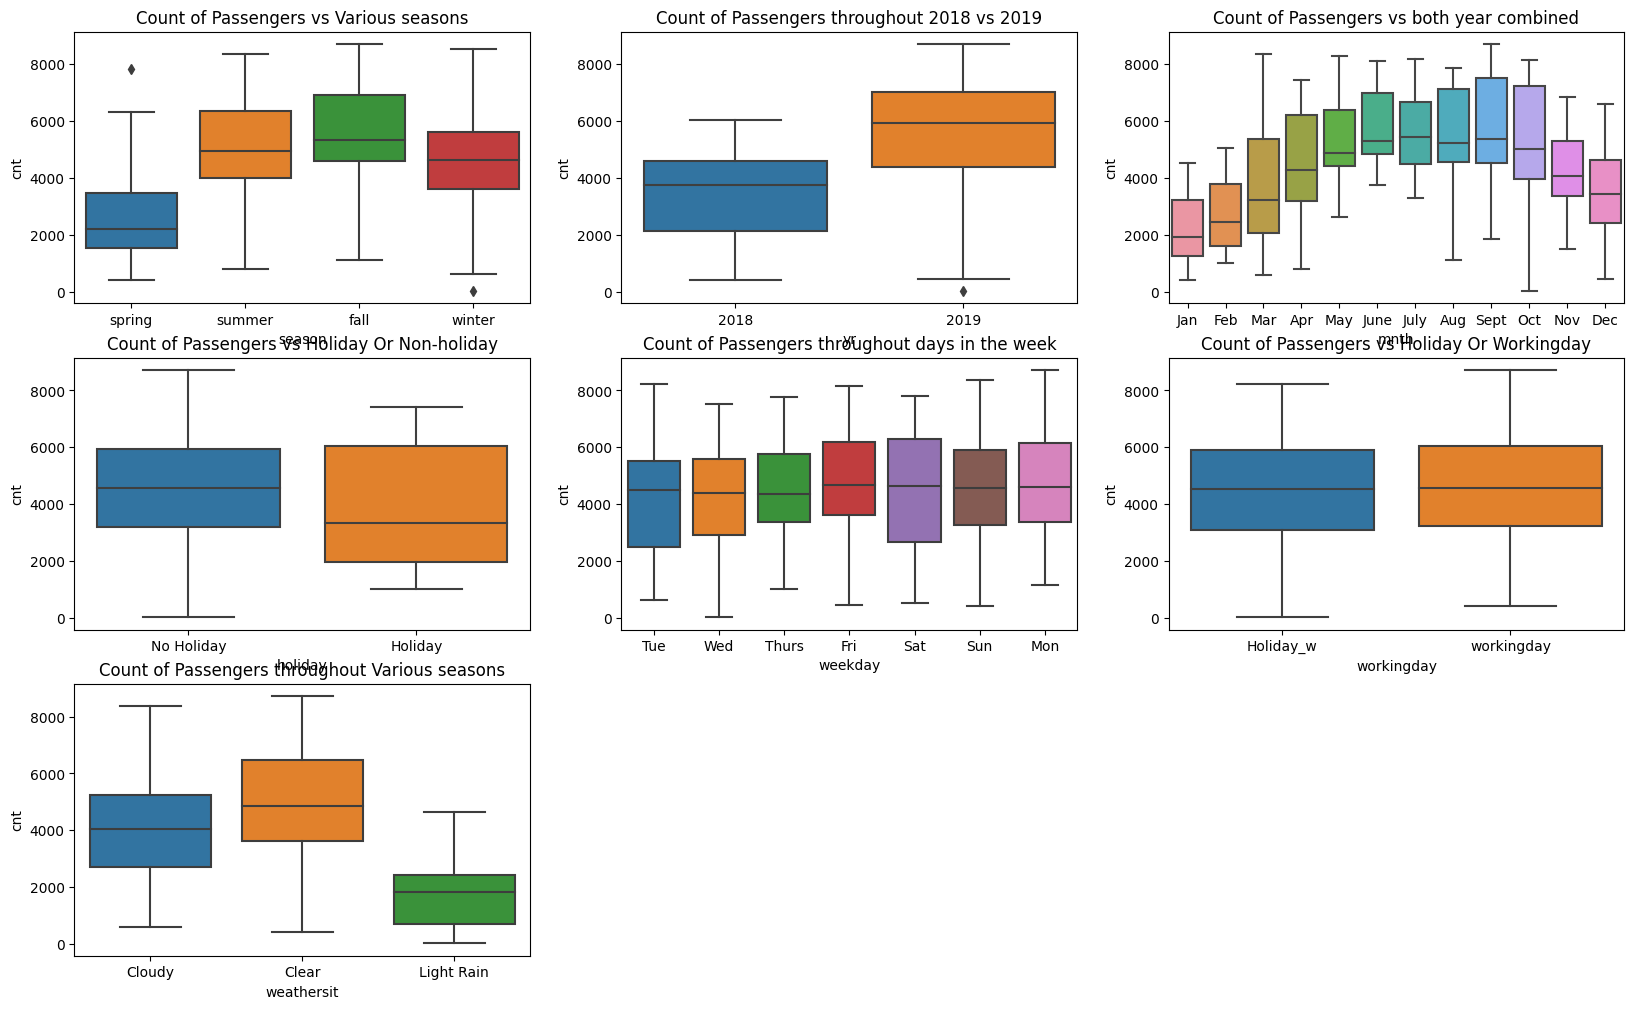

In [14]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(20,12)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=data).set_title('Count of Passengers vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=data).set_title('Count of Passengers throughout 2018 vs 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=data).set_title('Count of Passengers vs both year combined')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=data).set_title('Count of Passengers throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=data).set_title('Count of Passengers throughout Various seasons')

plt.show()

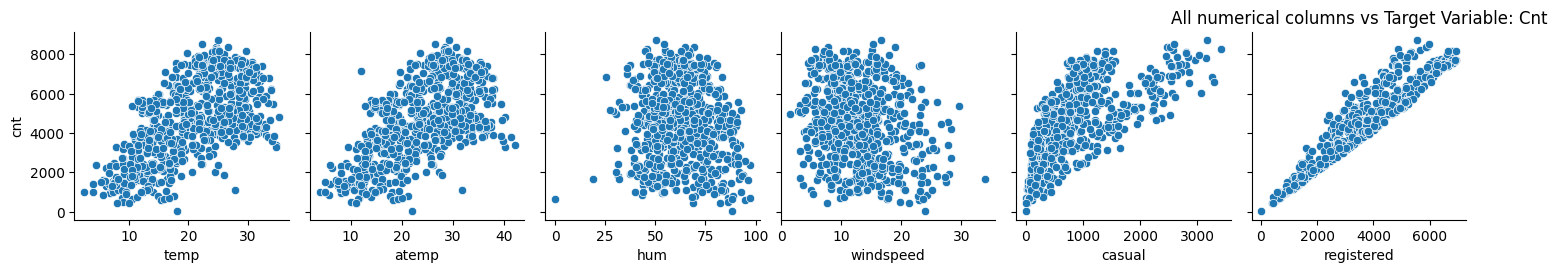

In [15]:
# Plotting scatter plot for numerical variables against our target variable 'cnt'
sns.pairplot(data,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

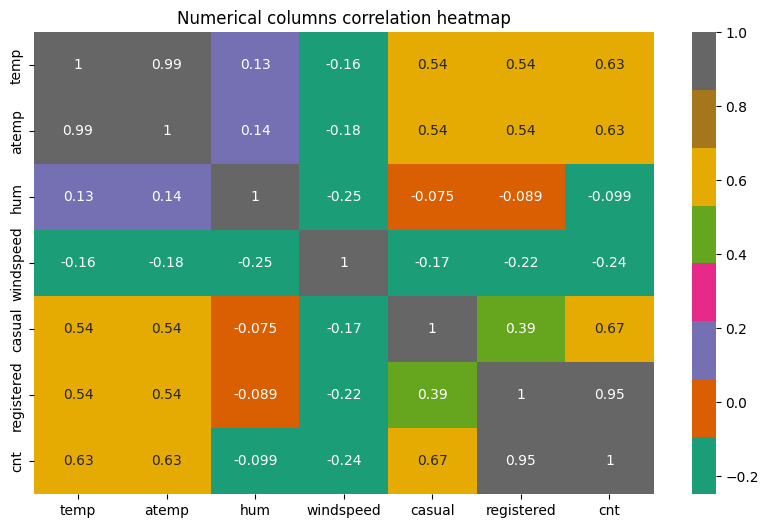

In [110]:
# Drop non-numeric columns before creating the correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])

# Create the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Dark2')
plt.title("Numerical columns correlation heatmap")
plt.show()


# <b style='color:red;'> Data Prepration </b>

We must convert these variables into dummy ones since machines can't interpret their indivisual nature.
The training and test sets should be separated.

After separating the training and test sets, you can then split the dataset into 70:30. Doing so will allow you to re-scale the variables.

Scale the data columns to make sure that they're not too large, as this can increase the processing time and make it hard to infer or calculate co-efficients.




In [17]:
# 1. Convert the categorical data into dummy variables with drop_first so that the machine uses k-1 columns
# Create a new dataframe to store them
status=pd.get_dummies(data[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
new_status = status.astype(int)
new_status.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
# We then join orignal data and the dummy variable dataframe 'status'.
final=pd.concat([data,new_status],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Tue,Holiday_w,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,spring,2018,Jan,No Holiday,Wed,Holiday_w,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,spring,2018,Jan,No Holiday,Fri,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,No Holiday,Sat,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
# We then drop the indivisual columns whose dummy variables have been created.
final=final.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
# Import libraries to train and test split
import sklearn
from sklearn.model_selection import train_test_split

In [99]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test=train_test_split(final,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [22]:
# Import libraries to scale all the variables
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Create an object to be scaled
scaler=MinMaxScaler()

In [24]:
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','casual','registered','cnt']

In [25]:
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


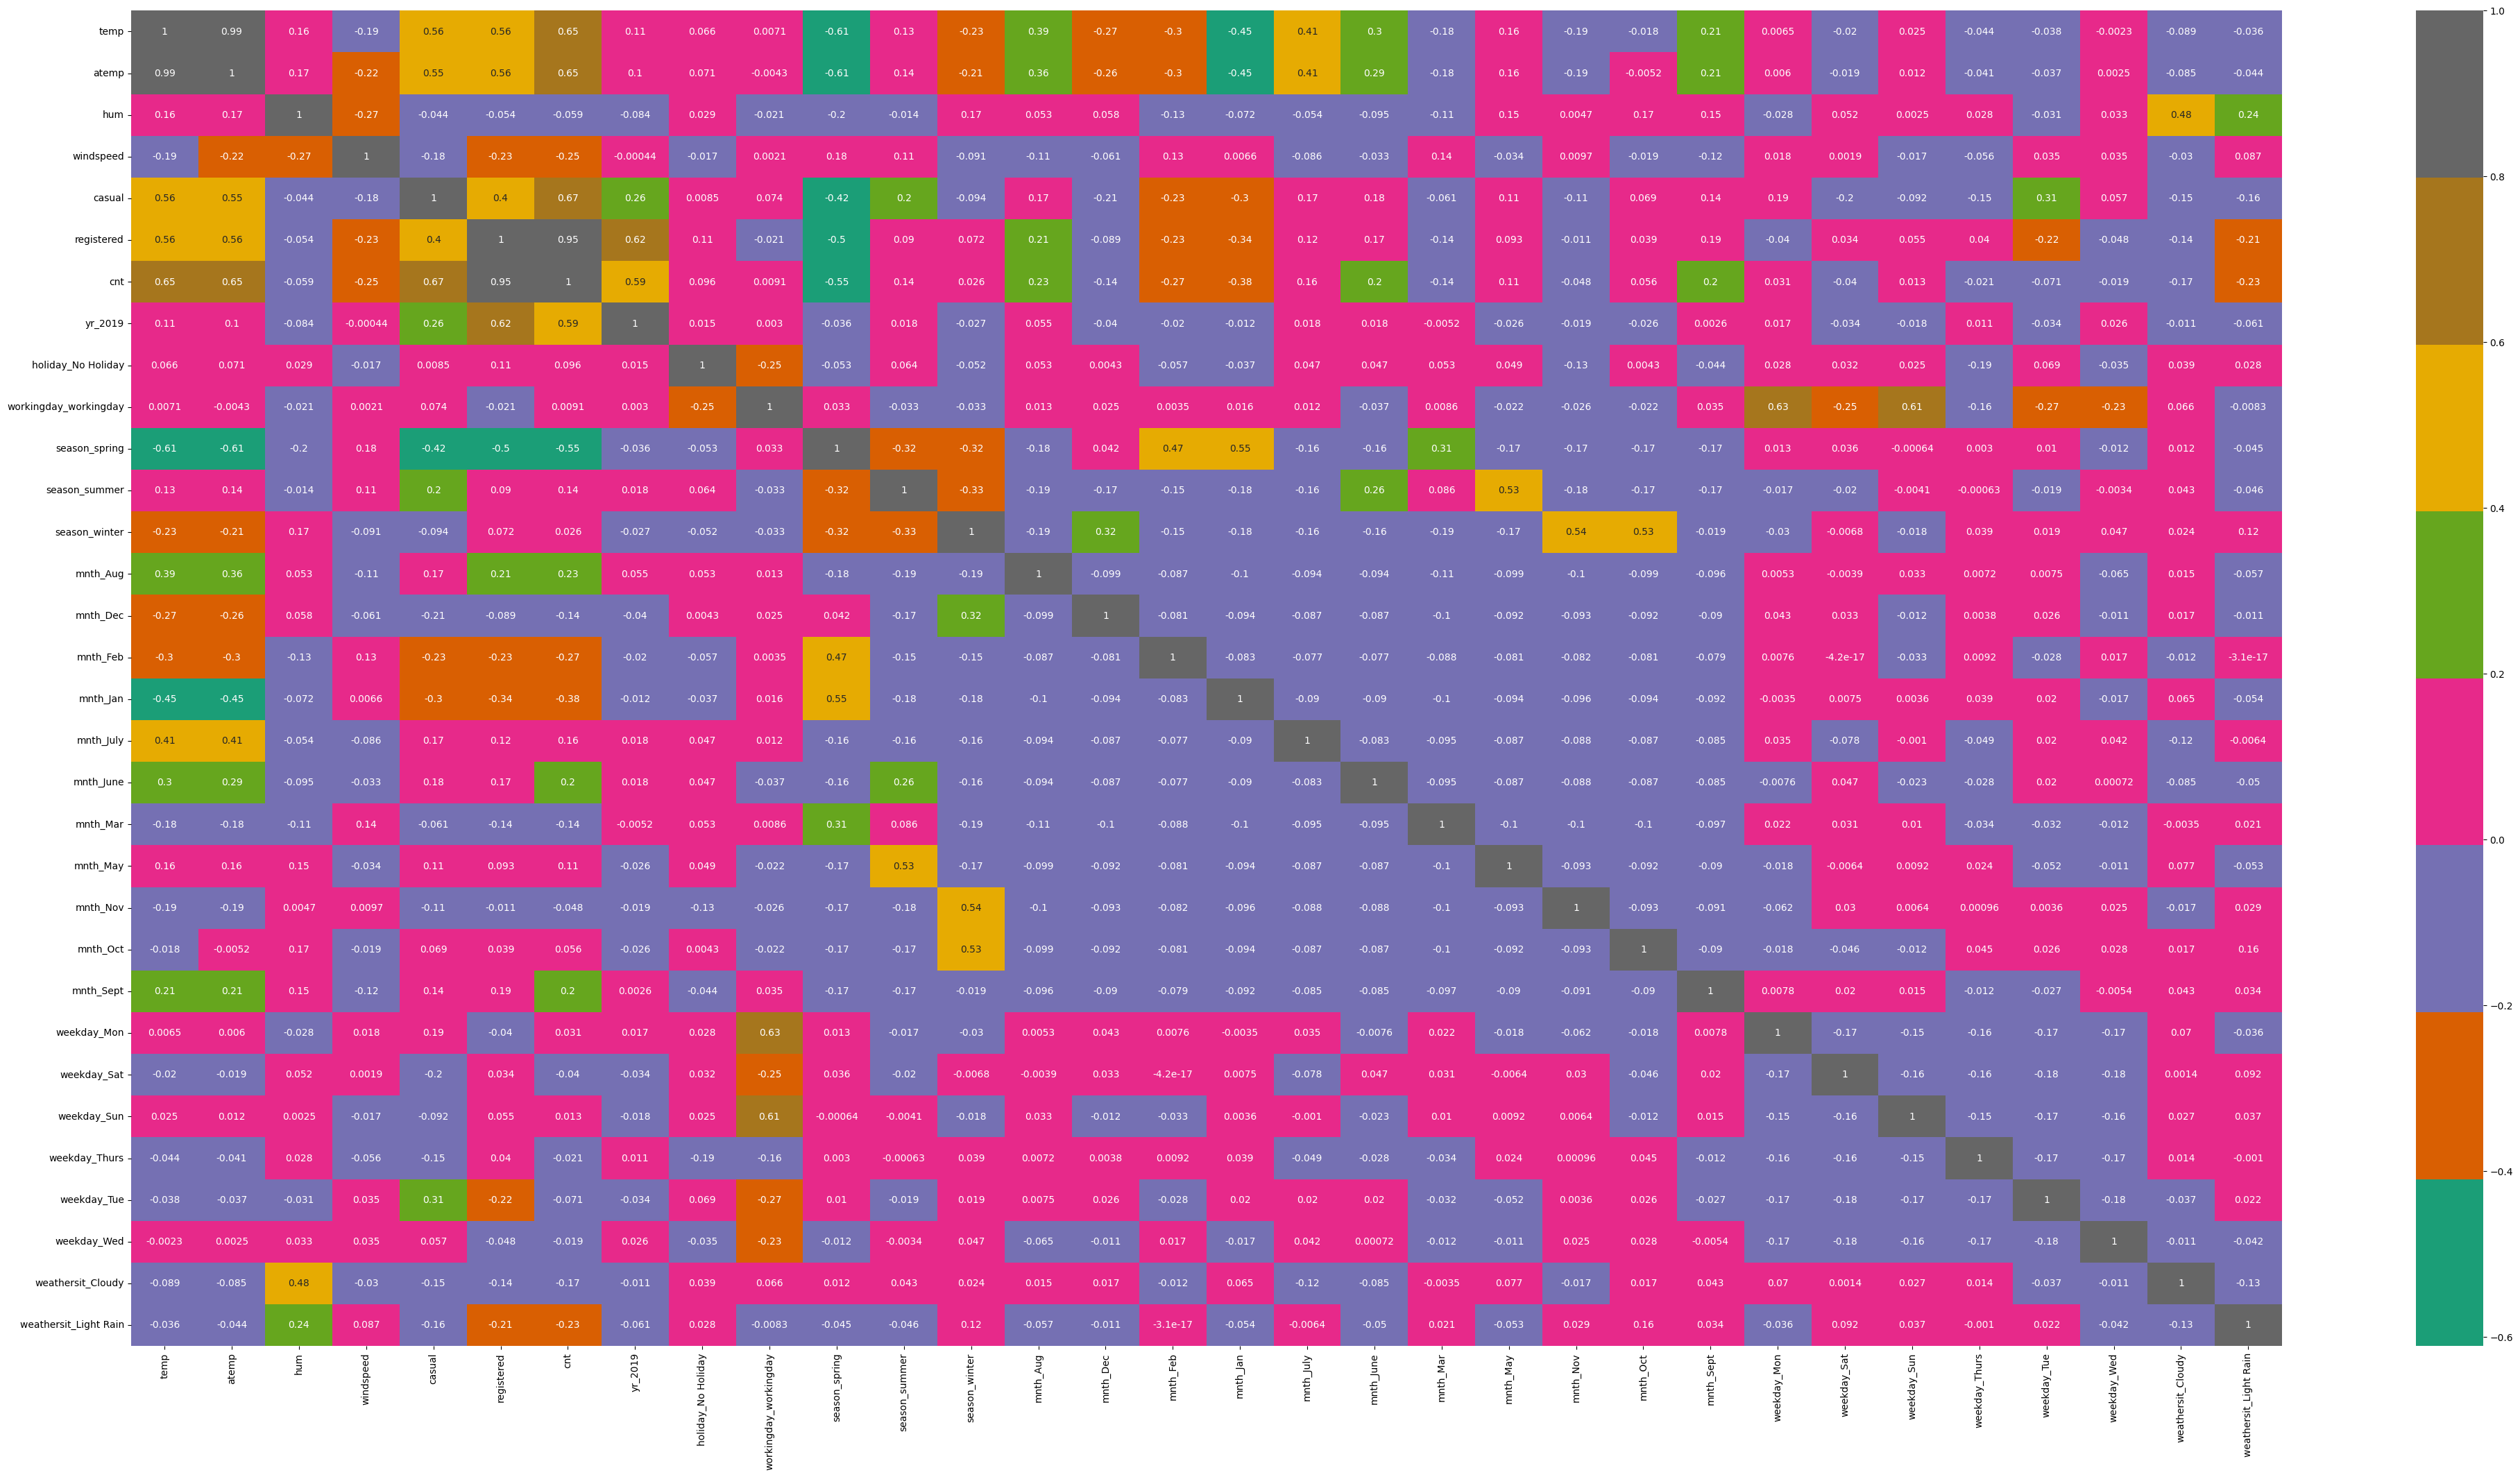

In [ ]:
# Plot the co-relation graph to check the co-relation between dumy variables
plt.figure(figsize=(50,25))
sns.heatmap(df_train.corr(),annot=True,cmap='Dark2')
plt.show()

# <b style='color:red;'> Training the Data </b>

In [27]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [28]:
# Creating a model with all the variables
import statsmodels.api as sm
X_train_xm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_xm).fit()

lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.256e+29
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:22:50   Log-Likelihood:                 16738.
No. Observations:                 510   AIC:                        -3.341e+04
Df Residuals:                     478   BIC:                        -3.328e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.189e-16   1.24e-15      0.418      0.676   -1.92e-15    2.96e-15
temp                   3.321e-15   2.26e-15      1.468      0.143   -1.12e-15    7.77e-15
atemp                 -1.517e-15   2.18e-15     -0.697      0.486    -5.8e-15    2.76e-15
hum                    3.696e-16   6.18e-16      0.598      0.550   -8.44e-16    1.58e-15
windspeed             -6.038e-17   4.37e-16     -0.138      0.890   -9.19e-16    7.98e-16
casual                    0.3775   5.13e-16   7.36e+14      0.000       0.377       0.377
registered                0.7968   6.71e-16   1.19e+15      0.000       0.797       0.797
yr_2019                2.671e-16   2.15e-16      1.241      0.215   -1.56e-16     6.9e-16
holiday_No Holiday    -4.904e-17   1.03e-15     -0.048      0.962   -2.07e-15    1.97e-15
workingday_workingday  3.315e-17   1.11e-15      0.030      0.976   -2.15e-15    2.22e-15
season_spring         -4.431e-16   4.74e-16     -0.935      0.350   -1.37e-15    4.88e-16
season_summer           -2.1e-16   4.15e-16     -0.506      0.613   -1.02e-15    6.05e-16
season_winter          2.666e-16   4.49e-16      0.593      0.553   -6.16e-16    1.15e-15
mnth_Aug              -5.611e-16   5.34e-16     -1.050      0.294   -1.61e-15    4.89e-16
mnth_Dec              -2.694e-16    5.3e-16     -0.508      0.612   -1.31e-15    7.73e-16
mnth_Feb              -1.736e-16   5.21e-16     -0.333      0.739    -1.2e-15    8.49e-16
mnth_Jan                1.55e-17   5.31e-16      0.029      0.977   -1.03e-15    1.06e-15
mnth_July             -8.508e-16   5.53e-16     -1.538      0.125   -1.94e-15    2.36e-16
mnth_June             -5.443e-16   3.95e-16     -1.378      0.169   -1.32e-15    2.32e-16
mnth_Mar              -1.796e-16   3.87e-16     -0.464      0.643    -9.4e-16    5.81e-16
mnth_May               4.467e-17   3.34e-16      0.134      0.894   -6.12e-16    7.01e-16
mnth_Nov               -7.14e-16   5.74e-16     -1.244      0.214   -1.84e-15    4.13e-16
mnth_Oct              -7.227e-16   5.67e-16     -1.275      0.203   -1.84e-15    3.91e-16
mnth_Sept             -4.577e-16   5.07e-16     -0.902      0.368   -1.45e-15    5.39e-16
weekday_Mon           -1.614e-16   1.12e-15     -0.144      0.886   -2.37e-15    2.05e-15
weekday_Sat           -8.584e-17   2.34e-16     -0.366      0.714   -5.46e-16    3.75e-16
weekday_Sun            3.117e-17   1.12e-15      0.028      0.978   -2.17e-15    2.24e-15
weekday_Thurs          1.464e-16   2.42e-16      0.606      0.545   -3.28e-16    6.21e-16
weekday_Tue            1.613e-17   2.89e-16      0.056      0.956   -5.53e-16    5.85e-16
weekday_Wed            3.126e-17   2.48e-16      0.126      0.900   -4.55e-16    5.18e-16
weathersit_Cloudy      2.172e-16   1.69e-16      1.283      0.200   -1.16e-16     5.5e-16
weathersit_Light Rain  

Reasoning: </b>Let's make our first model with all the variables and check it's R2 and p-value score.

In [29]:
# Import the Variance Inflation library 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Let's check it's ViF
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,453.56
1,atemp,383.72
7,holiday_No Holiday,98.45
8,workingday_workingday,43.14
2,hum,42.96
5,registered,37.77
23,weekday_Mon,24.10
25,weekday_Sun,22.15
9,season_spring,13.54
11,season_winter,12.90


Note:I looked into the co-relation between atemp and temp, which indicates that they share similar values. As a result, I believe that temp is important.

The values of co-efficiencies with p-value and ex are quite high. Because we're using redundant variables alongside co-related ones, we must remove them.

In [32]:
# Drop Variable temp
X=X.drop('atemp',axis=1)

In [33]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()

In [34]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.870e+30
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:29:31   Log-Likelihood:                 17531.
No. Observations:                 510   AIC:                        -3.500e+04
Df Residuals:                     479   BIC:                        -3.487e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.427e-

In [35]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_No Holiday,98.45
0,temp,54.48
7,workingday_workingday,43.11
1,hum,42.91
4,registered,37.69
22,weekday_Mon,24.08
24,weekday_Sun,22.15
8,season_spring,13.52
10,season_winter,12.89
9,season_summer,9.83


In [36]:
# Drop Holiday_No Holiday
X=X.drop('holiday_No Holiday',axis=1)

In [37]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.344e+29
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:30:44   Log-Likelihood:                 16822.
No. Observations:                 510   AIC:                        -3.358e+04
Df Residuals:                     480   BIC:                        -3.346e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.001e-

In [38]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.64
1,hum,38.39
4,registered,32.93
6,workingday_workingday,15.84
9,season_winter,12.72
7,season_spring,11.98
21,weekday_Mon,9.27
23,weekday_Sun,8.88
8,season_summer,7.69
3,casual,7.39


Note: The working day's VIF is 15 and its p-value is 0.220. I believe this is redundant since Weekdays' working day's p-value is very high, stating that the variable is not relevant to the model.

In [39]:
# Drop working day variable
X=X.drop('workingday_workingday',axis=1)

In [40]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.446e+29
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:31:35   Log-Likelihood:                 16569.
No. Observations:                 510   AIC:                        -3.308e+04
Df Residuals:                     481   BIC:                        -3.296e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.803e-16   1.04e-15      0.366      0.715   -1.66e-15    2.42e-15
temp                   -4.23e-16    1.1e-15     -0.384      0.701   -2.59e-15    1.74e-15
hum                    9.802e-16   8.56e-16      1.145      0.253   -7.01e-16    2.66e-15
windspeed              2.742e-16   5.94e-16      0.462      0.644   -8.92e-16    1.44e-15
casual                    0.3775   7.07e-16   5.34e+14      0.000       0.377       0.377
registered                0.7968   9.06e-16   8.79e+14      0.000       0.797       0.797
yr_2019                5.965e-16   2.95e-16      2.020      0.044    1.63e-17    1.18e-15
season_spring          2.256e-16   6.57e-16      0.343      0.731   -1.06e-15    1.52e-15
season_summer          3.273e-16   5.74e-16      0.570      0.569   -8.01e-16    1.46e-15
season_winter         -2.033e-16   6.23e-16     -0.326      0.744   -1.43e-15    1.02e-15
mnth_Aug               3.272e-16   7.34e-16      0.446      0.656   -1.12e-15    1.77e-15
mnth_Dec               2.383e-16   7.35e-16      0.324      0.746   -1.21e-15    1.68e-15
mnth_Feb               4.117e-16   7.22e-16      0.570      0.569   -1.01e-15    1.83e-15
mnth_Jan               2.277e-16   7.36e-16      0.309      0.757   -1.22e-15    1.67e-15
mnth_July              3.852e-16   7.65e-16      0.504      0.615   -1.12e-15    1.89e-15
mnth_June              1.759e-16   5.43e-16      0.324      0.746    -8.9e-16    1.24e-15
mnth_Mar                 2.1e-16   5.37e-16      0.391      0.696   -8.45e-16    1.26e-15
mnth_May              -1.562e-16   4.61e-16     -0.339      0.735   -1.06e-15    7.49e-16
mnth_Nov               1.962e-16   7.92e-16      0.248      0.804   -1.36e-15    1.75e-15
mnth_Oct               7.167e-17   7.86e-16      0.091      0.927   -1.47e-15    1.62e-15
mnth_Sept              9.743e-17   7.02e-16      0.139      0.890   -1.28e-15    1.48e-15
weekday_Mon             2.83e-16   3.66e-16      0.773      0.440   -4.37e-16       1e-15
weekday_Sat           -8.123e-19   3.25e-16     -0.002      0.998    -6.4e-16    6.38e-16
weekday_Sun            -1.78e-16   3.35e-16     -0.532      0.595   -8.36e-16     4.8e-16
weekday_Thurs          1.514e-17   3.31e-16      0.046      0.964   -6.35e-16    6.65e-16
weekday_Tue            8.602e-17   3.98e-16      0.216      0.829   -6.96e-16    8.68e-16
weekday_Wed            1.757e-17   3.43e-16      0.051      0.959   -6.57e-16    6.92e-16
weathersit_Cloudy      1.384e-16   2.34e-16      0.590      0.555   -3.22e-16    5.99e-16
weathersit_Light Rain -1.933e-16   6.25e-16     -0.309      0.757   -1.42e-15    1.04e-15
==============================================================================
Omnibus:                        6.515   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.038   Jarqu

In [41]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.00
1,hum,38.38
4,registered,31.56
8,season_winter,12.71
6,season_spring,11.98
7,season_summer,7.68
3,casual,7.30
18,mnth_Oct,6.36
9,mnth_Aug,6.14
17,mnth_Nov,6.05


Notes: The registration variable has 31 VIF and 0.797 p-value. This means that it's being utilized in other variables, such as casual. The target variables' p-value and VIF imply that it is redundant.

In [42]:
# Having registration and casual in one go does not make sense as they are inter-related
X=X.drop('registered',axis=1)

In [43]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          5.86e-209
Time:                        14:33:47   Log-Likelihood:                 595.06
No. Observations:                 510   AIC:                            -1134.
Df Residuals:                     482   BIC:                            -1016.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3359      0.039      8.669      0.000       0.260       0.412
temp                      0.2619      0.042      6.164      0.000       0.178       0.345
hum                      -0.1109      0.034     -3.272      0.001      -0.178      -0.044
windspeed                -0.1146      0.023     -4.938      0.000      -0.160      -0.069
casual                    0.3714      0.028     13.115      0.000       0.316       0.427
yr_2019                   0.2026      0.007     27.387      0.000       0.188       0.217
season_spring            -0.0442      0.026     -1.683      0.093      -0.096       0.007
season_summer             0.0128      0.023      0.557      0.578      -0.032       0.058
season_winter             0.1141      0.024      4.677      0.000       0.066       0.162
mnth_Aug                  0.0344      0.029      1.172      0.242      -0.023       0.092
mnth_Dec                 -0.0299      0.029     -1.016      0.310      -0.088       0.028
mnth_Feb                 -0.0261      0.029     -0.903      0.367      -0.083       0.031
mnth_Jan                 -0.0500      0.029     -1.699      0.090      -0.108       0.008
mnth_July                -0.0038      0.031     -0.123      0.902      -0.064       0.056
mnth_June                 0.0300      0.022      1.381      0.168      -0.013       0.073
mnth_Mar                 -0.0032      0.022     -0.150      0.881      -0.045       0.039
mnth_May                  0.0349      0.018      1.898      0.058      -0.001       0.071
mnth_Nov                 -0.0579      0.032     -1.830      0.068      -0.120       0.004
mnth_Oct                 -0.0292      0.031     -0.930      0.353      -0.091       0.033
mnth_Sept                 0.0709      0.028      2.538      0.011       0.016       0.126
weekday_Mon              -0.0711      0.014     -4.970      0.000      -0.099      -0.043
weekday_Sat              -0.0143      0.013     -1.096      0.273      -0.040       0.011
weekday_Sun              -0.0208      0.013     -1.553      0.121      -0.047       0.006
weekday_Thurs            -0.0326      0.013     -2.473      0.014      -0.058      -0.007
weekday_Tue              -0.1276      0.015     -8.594      0.000      -0.157      -0.098
weekday_Wed              -0.0807      0.013     -6.090      0.000      -0.107      -0.055
weathersit_Cloudy        -0.0383      0.009     -4.153      0.000      -0.056      -0.020
weathersit_Light Rain    -0.1893      0.024     -8.051      0.000      -0.235      -0.143
==============================================================================
Omnibus:                      132.493   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.248
Skew:                          -1.204   Prob(JB):       

In [44]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,41.52
1,hum,38.37
5,season_spring,11.90
7,season_winter,11.62
3,casual,7.30
6,season_summer,7.01
17,mnth_Oct,6.32
16,mnth_Nov,6.00
8,mnth_Aug,5.86
2,windspeed,5.44


Infrence: Now we see the co-efficients in normal acceptable limits for further infrences. Vif have also dropped and so have the p-values have changed.

Temprature and humidity are inversely co-related, which is a high-corelation concept. What's being captured by humidity is also being done by temprature.

In [45]:
# Temprature and Humidity are inversely co-related thus we would have to drop one of them. We would go with humidity
X=X.drop('hum',axis=1)

In [46]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_cm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          9.33e-208
Time:                        14:34:38   Log-Likelihood:                 589.46
No. Observations:                 510   AIC:                            -1125.
Df Residuals:                     483   BIC:                            -1011.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2928      0.037      7.956      0.000       0.220       0.365
temp                      0.2218      0.041      5.397      0.000       0.141       0.303
windspeed                -0.0928      0.022     -4.134      0.000      -0.137      -0.049
casual                    0.3805      0.028     13.370      0.000       0.325       0.436
yr_2019                   0.2046      0.007     27.465      0.000       0.190       0.219
season_spring            -0.0473      0.026     -1.786      0.075      -0.099       0.005
season_summer             0.0056      0.023      0.240      0.810      -0.040       0.051
season_winter             0.1113      0.025      4.519      0.000       0.063       0.160
mnth_Aug                  0.0323      0.030      1.087      0.277      -0.026       0.091
mnth_Dec                 -0.0452      0.029     -1.542      0.124      -0.103       0.012
mnth_Feb                 -0.0353      0.029     -1.214      0.225      -0.092       0.022
mnth_Jan                 -0.0631      0.029     -2.145      0.032      -0.121      -0.005
mnth_July                -0.0006      0.031     -0.018      0.985      -0.061       0.060
mnth_June                 0.0360      0.022      1.648      0.100      -0.007       0.079
mnth_Mar                 -0.0089      0.022     -0.412      0.680      -0.051       0.034
mnth_May                  0.0301      0.019      1.626      0.105      -0.006       0.066
mnth_Nov                 -0.0699      0.032     -2.204      0.028      -0.132      -0.008
mnth_Oct                 -0.0425      0.031     -1.350      0.178      -0.104       0.019
mnth_Sept                 0.0621      0.028      2.212      0.027       0.007       0.117
weekday_Mon              -0.0720      0.014     -4.980      0.000      -0.100      -0.044
weekday_Sat              -0.0159      0.013     -1.212      0.226      -0.042       0.010
weekday_Sun              -0.0204      0.014     -1.508      0.132      -0.047       0.006
weekday_Thurs            -0.0337      0.013     -2.539      0.011      -0.060      -0.008
weekday_Tue              -0.1310      0.015     -8.752      0.000      -0.160      -0.102
weekday_Wed              -0.0849      0.013     -6.371      0.000      -0.111      -0.059
weathersit_Cloudy        -0.0549      0.008     -7.045      0.000      -0.070      -0.040
weathersit_Light Rain    -0.2176      0.022     -9.857      0.000      -0.261      -0.174
==============================================================================
Omnibus:                      129.011   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.157
Skew:                          -1.178   Prob(JB):                     7.76e-88
Kurtosis:                       6.650   Cond. No.                  

In [47]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,30.02
4,season_spring,11.41
6,season_winter,11.40
2,casual,7.22
5,season_summer,5.86
16,mnth_Oct,5.85
7,mnth_Aug,5.65
15,mnth_Nov,5.44
1,windspeed,5.22
11,mnth_July,5.19


The next big variable with a p-value of 0.075 is season spring. I believe that the data being presented by this variable is from 2019 and 2018. The co-relation between temp and season spring is very high.

In [48]:
# Spring and winter have a co-relation of -0.32 thus we can drop one of them too. Because we have summer, we need to have winter. Thus we can drop spring
X=X.drop('season_spring',axis=1)

In [49]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_cm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          3.69e-208
Time:                        14:35:22   Log-Likelihood:                 587.78
No. Observations:                 510   AIC:                            -1124.
Df Residuals:                     484   BIC:                            -1013.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2637      0.033      7.972      0.000       0.199       0.329
temp                      0.2303      0.041      5.629      0.000       0.150       0.311
windspeed                -0.0957      0.022     -4.263      0.000      -0.140      -0.052
casual                    0.3803      0.029     13.332      0.000       0.324       0.436
yr_2019                   0.2043      0.007     27.372      0.000       0.190       0.219
season_summer             0.0324      0.018      1.839      0.067      -0.002       0.067
season_winter             0.1377      0.020      6.977      0.000       0.099       0.176
mnth_Aug                  0.0561      0.027      2.111      0.035       0.004       0.108
mnth_Dec                 -0.0502      0.029     -1.715      0.087      -0.108       0.007
mnth_Feb                 -0.0542      0.027     -1.998      0.046      -0.107      -0.001
mnth_Jan                 -0.0814      0.028     -2.948      0.003      -0.136      -0.027
mnth_July                 0.0228      0.028      0.810      0.418      -0.032       0.078
mnth_June                 0.0430      0.022      1.997      0.046       0.001       0.085
mnth_Mar                 -0.0215      0.021     -1.050      0.294      -0.062       0.019
mnth_May                  0.0284      0.019      1.529      0.127      -0.008       0.065
mnth_Nov                 -0.0689      0.032     -2.170      0.031      -0.131      -0.007
mnth_Oct                 -0.0429      0.032     -1.358      0.175      -0.105       0.019
mnth_Sept                 0.0809      0.026      3.098      0.002       0.030       0.132
weekday_Mon              -0.0722      0.014     -4.980      0.000      -0.101      -0.044
weekday_Sat              -0.0163      0.013     -1.242      0.215      -0.042       0.010
weekday_Sun              -0.0215      0.014     -1.587      0.113      -0.048       0.005
weekday_Thurs            -0.0342      0.013     -2.570      0.010      -0.060      -0.008
weekday_Tue              -0.1323      0.015     -8.832      0.000      -0.162      -0.103
weekday_Wed              -0.0857      0.013     -6.416      0.000      -0.112      -0.059
weathersit_Cloudy        -0.0548      0.008     -7.012      0.000      -0.070      -0.039
weathersit_Light Rain    -0.2154      0.022     -9.751      0.000      -0.259      -0.172
==============================================================================
Omnibus:                      125.228   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.979
Skew:                          -1.150   Prob(JB):                     1.13e-83
Kurtosis:                       6.561   Cond. No.                         31.9
==============================================================================

In [50]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,28.61
5,season_winter,7.96
2,casual,7.22
15,mnth_Oct,5.56
6,mnth_Aug,5.09
14,mnth_Nov,5.07
1,windspeed,5.00
10,mnth_July,4.71
4,season_summer,4.21
16,mnth_Sept,3.75


In [51]:
# Temprature and Casual have a high co-relation of 0.56 thus we would need to remove casual
X=X.drop('casual',axis=1)

In [52]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_cm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.50e-176
Time:                        14:36:05   Log-Likelihood:                 508.02
No. Observations:                 510   AIC:                            -966.0
Df Residuals:                     485   BIC:                            -860.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2505      0.039      6.485      0.000       0.175       0.326
temp                      0.3894      0.046      8.518      0.000       0.300       0.479
windspeed                -0.1585      0.026     -6.185      0.000      -0.209      -0.108
yr_2019                   0.2357      0.008     28.478      0.000       0.219       0.252
season_summer             0.0621      0.020      3.040      0.002       0.022       0.102
season_winter             0.1390      0.023      6.028      0.000       0.094       0.184
mnth_Aug                  0.0500      0.031      1.611      0.108      -0.011       0.111
mnth_Dec                 -0.0771      0.034     -2.262      0.024      -0.144      -0.010
mnth_Feb                 -0.0734      0.032     -2.322      0.021      -0.136      -0.011
mnth_Jan                 -0.1050      0.032     -3.261      0.001      -0.168      -0.042
mnth_July                 0.0013      0.033      0.041      0.967      -0.063       0.066
mnth_June                 0.0267      0.025      1.064      0.288      -0.023       0.076
mnth_Mar                 -0.0184      0.024     -0.768      0.443      -0.065       0.029
mnth_May                  0.0189      0.022      0.875      0.382      -0.024       0.061
mnth_Nov                 -0.0701      0.037     -1.889      0.059      -0.143       0.003
mnth_Oct                 -0.0183      0.037     -0.496      0.620      -0.091       0.054
mnth_Sept                 0.0941      0.030      3.089      0.002       0.034       0.154
weekday_Mon               0.0051      0.016      0.330      0.742      -0.025       0.036
weekday_Sat              -0.0075      0.015     -0.491      0.624      -0.038       0.023
weekday_Sun              -0.0019      0.016     -0.119      0.906      -0.033       0.029
weekday_Thurs            -0.0240      0.016     -1.543      0.124      -0.054       0.007
weekday_Tue              -0.0315      0.015     -2.088      0.037      -0.061      -0.002
weekday_Wed              -0.0381      0.015     -2.536      0.012      -0.068      -0.009
weathersit_Cloudy        -0.0804      0.009     -9.091      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2867      0.025    -11.450      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.613   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.799
Skew:                          -0.842   Prob(JB):                     2.30e-52
Kurtosis:                       5.891   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [53]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.10
4,season_winter,7.96
14,mnth_Oct,5.55
5,mnth_Aug,5.09
13,mnth_Nov,5.07
1,windspeed,4.74
9,mnth_July,4.69
3,season_summer,4.13
15,mnth_Sept,3.75
6,mnth_Dec,3.40


Reasoning: July month does not have a high VIF as compared to other variables and it's p-value is 0.967 but it's data is being captured by other variables like days and months. It's high value is also states that it is statistically redundant.

In [55]:
# Month july has p-value of 0.967
X=X.drop('mnth_July',axis=1)

In [56]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_cm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.40e-177
Time:                        14:41:43   Log-Likelihood:                 508.02
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     486   BIC:                            -866.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2509      0.037      6.703      0.000       0.177       0.324
temp                      0.3902      0.041      9.566      0.000       0.310       0.470
windspeed                -0.1586      0.025     -6.231      0.000      -0.209      -0.109
yr_2019                   0.2356      0.008     28.606      0.000       0.219       0.252
season_summer             0.0616      0.017      3.704      0.000       0.029       0.094
season_winter             0.1390      0.023      6.034      0.000       0.094       0.184
mnth_Aug                  0.0490      0.018      2.658      0.008       0.013       0.085
mnth_Dec                 -0.0777      0.030     -2.553      0.011      -0.138      -0.018
mnth_Feb                 -0.0740      0.028     -2.613      0.009      -0.130      -0.018
mnth_Jan                 -0.1056      0.030     -3.570      0.000      -0.164      -0.047
mnth_June                 0.0260      0.019      1.383      0.167      -0.011       0.063
mnth_Mar                 -0.0189      0.020     -0.922      0.357      -0.059       0.021
mnth_May                  0.0185      0.019      0.965      0.335      -0.019       0.056
mnth_Nov                 -0.0708      0.033     -2.125      0.034      -0.136      -0.005
mnth_Oct                 -0.0190      0.031     -0.607      0.544      -0.081       0.043
mnth_Sept                 0.0932      0.020      4.609      0.000       0.053       0.133
weekday_Mon               0.0051      0.015      0.331      0.741      -0.025       0.036
weekday_Sat              -0.0076      0.015     -0.494      0.622      -0.038       0.023
weekday_Sun              -0.0019      0.016     -0.119      0.905      -0.033       0.029
weekday_Thurs            -0.0240      0.016     -1.544      0.123      -0.054       0.007
weekday_Tue              -0.0315      0.015     -2.090      0.037      -0.061      -0.002
weekday_Wed              -0.0381      0.015     -2.539      0.011      -0.068      -0.009
weathersit_Cloudy        -0.0804      0.009     -9.103      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2867      0.025    -11.469      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.468   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.122
Skew:                          -0.841   Prob(JB):                     3.23e-52
Kurtosis:                       5.886   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.23
4,season_winter,7.96
1,windspeed,4.73
12,mnth_Nov,4.35
13,mnth_Oct,4.30
6,mnth_Dec,2.88
3,season_summer,2.86
2,yr_2019,2.10
16,weekday_Sat,2.01
20,weekday_Wed,2.00


October's VIF is below 5, and its p-value is 0.544. But, I believe that the data being collected by other variables, such as Year 2019, Weekdays, and winters, are not relevant to the model.

In [58]:
# Month October has a high p-value of 0.544
X=X.drop('mnth_Oct',axis=1)

In [59]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_cm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.54e-178
Time:                        14:42:28   Log-Likelihood:                 507.82
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     487   BIC:                            -872.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2421      0.034      7.020      0.000       0.174       0.310
temp                      0.3977      0.039     10.240      0.000       0.321       0.474
windspeed                -0.1592      0.025     -6.260      0.000      -0.209      -0.109
yr_2019                   0.2357      0.008     28.639      0.000       0.220       0.252
season_summer             0.0652      0.015      4.207      0.000       0.035       0.096
season_winter             0.1288      0.016      8.114      0.000       0.098       0.160
mnth_Aug                  0.0519      0.018      2.920      0.004       0.017       0.087
mnth_Dec                 -0.0642      0.021     -3.104      0.002      -0.105      -0.024
mnth_Feb                 -0.0671      0.026     -2.589      0.010      -0.118      -0.016
mnth_Jan                 -0.0981      0.027     -3.648      0.000      -0.151      -0.045
mnth_June                 0.0268      0.019      1.430      0.153      -0.010       0.064
mnth_Mar                 -0.0142      0.019     -0.750      0.454      -0.052       0.023
mnth_May                  0.0190      0.019      0.992      0.322      -0.019       0.057
mnth_Nov                 -0.0546      0.020     -2.740      0.006      -0.094      -0.015
mnth_Sept                 0.0992      0.018      5.633      0.000       0.065       0.134
weekday_Mon               0.0053      0.015      0.340      0.734      -0.025       0.036
weekday_Sat              -0.0077      0.015     -0.503      0.615      -0.038       0.022
weekday_Sun              -0.0020      0.016     -0.125      0.900      -0.033       0.029
weekday_Thurs            -0.0241      0.016     -1.553      0.121      -0.055       0.006
weekday_Tue              -0.0315      0.015     -2.088      0.037      -0.061      -0.002
weekday_Wed              -0.0379      0.015     -2.528      0.012      -0.067      -0.008
weathersit_Cloudy        -0.0806      0.009     -9.139      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2877      0.025    -11.544      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       88.530   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.355
Skew:                          -0.850   Prob(JB):                     6.42e-53
Kurtosis:                       5.902   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.18
1,windspeed,4.59
4,season_winter,2.85
3,season_summer,2.76
2,yr_2019,2.10
19,weekday_Wed,1.99
15,weekday_Sat,1.99
18,weekday_Tue,1.96
14,weekday_Mon,1.90
11,mnth_May,1.88


In [61]:
# Both monday and sunday have high p-values but I feel sunday is more redundant as a variable than Monday
X=X.drop('weekday_Sun',axis=1)

In [62]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_cm).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.38e-179
Time:                        14:43:16   Log-Likelihood:                 507.82
No. Observations:                 510   AIC:                            -971.6
Df Residuals:                     488   BIC:                            -878.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2411      0.034      7.191      0.000       0.175       0.307
temp                      0.3978      0.039     10.255      0.000       0.322       0.474
windspeed                -0.1592      0.025     -6.268      0.000      -0.209      -0.109
yr_2019                   0.2357      0.008     28.679      0.000       0.220       0.252
season_summer             0.0653      0.015      4.217      0.000       0.035       0.096
season_winter             0.1289      0.016      8.127      0.000       0.098       0.160
mnth_Aug                  0.0519      0.018      2.921      0.004       0.017       0.087
mnth_Dec                 -0.0642      0.021     -3.112      0.002      -0.105      -0.024
mnth_Feb                 -0.0670      0.026     -2.589      0.010      -0.118      -0.016
mnth_Jan                 -0.0981      0.027     -3.652      0.000      -0.151      -0.045
mnth_June                 0.0268      0.019      1.429      0.154      -0.010       0.064
mnth_Mar                 -0.0142      0.019     -0.750      0.454      -0.052       0.023
mnth_May                  0.0190      0.019      0.993      0.321      -0.019       0.057
mnth_Nov                 -0.0546      0.020     -2.744      0.006      -0.094      -0.016
mnth_Sept                 0.0992      0.018      5.638      0.000       0.065       0.134
weekday_Mon               0.0062      0.013      0.460      0.646      -0.020       0.033
weekday_Sat              -0.0067      0.013     -0.509      0.611      -0.033       0.019
weekday_Thurs            -0.0231      0.014     -1.708      0.088      -0.050       0.003
weekday_Tue              -0.0305      0.013     -2.345      0.019      -0.056      -0.005
weekday_Wed              -0.0370      0.013     -2.843      0.005      -0.063      -0.011
weathersit_Cloudy        -0.0806      0.009     -9.177      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2879      0.025    -11.602      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       88.736   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.757
Skew:                          -0.852   Prob(JB):                     5.25e-53
Kurtosis:                       5.902   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.15
1,windspeed,4.55
4,season_winter,2.81
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.83
12,mnth_Nov,1.81
9,mnth_June,1.62
19,weathersit_Cloudy,1.61


The Weekday Sat's VIF is 1.55 and its p-value stands at 0.611, which means that it's mapping the data that other variables are collecting.

In [64]:
X=X.drop('weekday_Sat',axis=1)

In [65]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.36e-180
Time:                        14:44:13   Log-Likelihood:                 507.68
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     489   BIC:                            -884.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2388      0.033      7.193      0.000       0.174       0.304
temp                      0.3982      0.039     10.276      0.000       0.322       0.474
windspeed                -0.1594      0.025     -6.280      0.000      -0.209      -0.110
yr_2019                   0.2358      0.008     28.715      0.000       0.220       0.252
season_summer             0.0655      0.015      4.237      0.000       0.035       0.096
season_winter             0.1290      0.016      8.141      0.000       0.098       0.160
mnth_Aug                  0.0517      0.018      2.913      0.004       0.017       0.087
mnth_Dec                 -0.0649      0.021     -3.149      0.002      -0.105      -0.024
mnth_Feb                 -0.0670      0.026     -2.594      0.010      -0.118      -0.016
mnth_Jan                 -0.0984      0.027     -3.664      0.000      -0.151      -0.046
mnth_June                 0.0259      0.019      1.391      0.165      -0.011       0.063
mnth_Mar                 -0.0145      0.019     -0.764      0.445      -0.052       0.023
mnth_May                  0.0188      0.019      0.981      0.327      -0.019       0.056
mnth_Nov                 -0.0550      0.020     -2.766      0.006      -0.094      -0.016
mnth_Sept                 0.0989      0.018      5.628      0.000       0.064       0.133
weekday_Mon               0.0086      0.013      0.676      0.499      -0.016       0.033
weekday_Thurs            -0.0208      0.013     -1.633      0.103      -0.046       0.004
weekday_Tue              -0.0281      0.012     -2.318      0.021      -0.052      -0.004
weekday_Wed              -0.0347      0.012     -2.847      0.005      -0.059      -0.011
weathersit_Cloudy        -0.0808      0.009     -9.201      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2891      0.025    -11.701      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       89.052   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.003
Skew:                          -0.852   Prob(JB):                     1.04e-53
Kurtosis:                       5.929   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.84
1,windspeed,4.54
4,season_winter,2.80
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
18,weathersit_Cloudy,1.61
9,mnth_June,1.61


Weekday Mon has a VIF of 1.33 and it's p-value 0.499 thus it is again mapping the data which other variables are also mapping like yr 2019, summer and winter. Thus it can be dropped too.

In [68]:
X=X.drop('weekday_Mon',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.44e-181
Time:                        14:44:51   Log-Likelihood:                 507.44
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     490   BIC:                            -890.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2410      0.033      7.298      0.000       0.176       0.306
temp                      0.3980      0.039     10.277      0.000       0.322       0.474
windspeed                -0.1589      0.025     -6.266      0.000      -0.209      -0.109
yr_2019                   0.2359      0.008     28.748      0.000       0.220       0.252
season_summer             0.0652      0.015      4.223      0.000       0.035       0.096
season_winter             0.1289      0.016      8.142      0.000       0.098       0.160
mnth_Aug                  0.0513      0.018      2.898      0.004       0.017       0.086
mnth_Dec                 -0.0647      0.021     -3.142      0.002      -0.105      -0.024
mnth_Feb                 -0.0673      0.026     -2.607      0.009      -0.118      -0.017
mnth_Jan                 -0.0987      0.027     -3.679      0.000      -0.151      -0.046
mnth_June                 0.0258      0.019      1.385      0.167      -0.011       0.062
mnth_Mar                 -0.0147      0.019     -0.777      0.438      -0.052       0.023
mnth_May                  0.0184      0.019      0.965      0.335      -0.019       0.056
mnth_Nov                 -0.0558      0.020     -2.810      0.005      -0.095      -0.017
mnth_Sept                 0.0986      0.018      5.618      0.000       0.064       0.133
weekday_Thurs            -0.0229      0.012     -1.857      0.064      -0.047       0.001
weekday_Tue              -0.0303      0.012     -2.583      0.010      -0.053      -0.007
weekday_Wed              -0.0368      0.012     -3.131      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0804      0.009     -9.181      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2897      0.025    -11.744      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       87.256   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.964
Skew:                          -0.833   Prob(JB):                     4.74e-53
Kurtosis:                       5.927   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.65
1,windspeed,4.51
4,season_winter,2.79
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
17,weathersit_Cloudy,1.60


In [70]:
# We can drop Spring months which are march and may
X=X.drop('mnth_Mar',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.60e-182
Time:                        14:45:35   Log-Likelihood:                 507.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     491   BIC:                            -895.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2254      0.026      8.599      0.000       0.174       0.277
temp                      0.4136      0.033     12.486      0.000       0.349       0.479
windspeed                -0.1586      0.025     -6.261      0.000      -0.208      -0.109
yr_2019                   0.2356      0.008     28.758      0.000       0.219       0.252
season_summer             0.0685      0.015      4.613      0.000       0.039       0.098
season_winter             0.1342      0.014      9.401      0.000       0.106       0.162
mnth_Aug                  0.0544      0.017      3.146      0.002       0.020       0.088
mnth_Dec                 -0.0581      0.019     -3.097      0.002      -0.095      -0.021
mnth_Feb                 -0.0563      0.022     -2.610      0.009      -0.099      -0.014
mnth_Jan                 -0.0865      0.022     -3.974      0.000      -0.129      -0.044
mnth_June                 0.0272      0.019      1.465      0.144      -0.009       0.064
mnth_May                  0.0205      0.019      1.086      0.278      -0.017       0.058
mnth_Nov                 -0.0517      0.019     -2.702      0.007      -0.089      -0.014
mnth_Sept                 0.1022      0.017      6.029      0.000       0.069       0.135
weekday_Thurs            -0.0225      0.012     -1.830      0.068      -0.047       0.002
weekday_Tue              -0.0295      0.012     -2.526      0.012      -0.052      -0.007
weekday_Wed              -0.0365      0.012     -3.109      0.002      -0.060      -0.013
weathersit_Cloudy        -0.0805      0.009     -9.196      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2894      0.025    -11.737      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       84.609   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.723
Skew:                          -0.821   Prob(JB):                     1.59e-49
Kurtosis:                       5.807   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.62
1,windspeed,4.16
3,season_summer,2.72
4,season_winter,2.71
2,yr_2019,2.08
10,mnth_May,1.80
11,mnth_Nov,1.79
5,mnth_Aug,1.76
16,weathersit_Cloudy,1.58
9,mnth_June,1.54


May Month has a VIF of 1.80 but has a p-value of 0.278 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [72]:
X=X.drop('mnth_May',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.29e-183
Time:                        14:46:07   Log-Likelihood:                 506.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     492   BIC:                            -900.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2207      0.026      8.535      0.000       0.170       0.271
temp                      0.4239      0.032     13.350      0.000       0.362       0.486
windspeed                -0.1610      0.025     -6.377      0.000      -0.211      -0.111
yr_2019                   0.2349      0.008     28.752      0.000       0.219       0.251
season_summer             0.0767      0.013      5.990      0.000       0.052       0.102
season_winter             0.1344      0.014      9.411      0.000       0.106       0.162
mnth_Aug                  0.0516      0.017      3.019      0.003       0.018       0.085
mnth_Dec                 -0.0561      0.019     -3.005      0.003      -0.093      -0.019
mnth_Feb                 -0.0534      0.021     -2.494      0.013      -0.096      -0.011
mnth_Jan                 -0.0832      0.022     -3.857      0.000      -0.126      -0.041
mnth_June                 0.0197      0.017      1.143      0.254      -0.014       0.054
mnth_Nov                 -0.0503      0.019     -2.631      0.009      -0.088      -0.013
mnth_Sept                 0.1005      0.017      5.953      0.000       0.067       0.134
weekday_Thurs            -0.0223      0.012     -1.810      0.071      -0.047       0.002
weekday_Tue              -0.0298      0.012     -2.553      0.011      -0.053      -0.007
weekday_Wed              -0.0368      0.012     -3.130      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0799      0.009     -9.146      0.000      -0.097      -0.063
weathersit_Light Rain    -0.2900      0.025    -11.762      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       83.615   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.691
Skew:                          -0.825   Prob(JB):                     3.96e-47
Kurtosis:                       5.708   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.12
1,windspeed,4.02
4,season_winter,2.70
2,yr_2019,2.07
3,season_summer,2.07
10,mnth_Nov,1.79
5,mnth_Aug,1.72
15,weathersit_Cloudy,1.58
6,mnth_Dec,1.42
11,mnth_Sept,1.39


June Month has a VIF of 1.35 but has a p-value of 0.254 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [74]:
X=X.drop('mnth_June',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          3.39e-184
Time:                        14:46:37   Log-Likelihood:                 505.84
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     493   BIC:                            -905.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2158      0.026      8.460      0.000       0.166       0.266
temp                      0.4359      0.030     14.546      0.000       0.377       0.495
windspeed                -0.1615      0.025     -6.394      0.000      -0.211      -0.112
yr_2019                   0.2347      0.008     28.724      0.000       0.219       0.251
season_summer             0.0788      0.013      6.222      0.000       0.054       0.104
season_winter             0.1337      0.014      9.368      0.000       0.106       0.162
mnth_Aug                  0.0472      0.017      2.832      0.005       0.014       0.080
mnth_Dec                 -0.0545      0.019     -2.923      0.004      -0.091      -0.018
mnth_Feb                 -0.0516      0.021     -2.414      0.016      -0.094      -0.010
mnth_Jan                 -0.0804      0.021     -3.753      0.000      -0.123      -0.038
mnth_Nov                 -0.0491      0.019     -2.572      0.010      -0.087      -0.012
mnth_Sept                 0.0975      0.017      5.846      0.000       0.065       0.130
weekday_Thurs            -0.0224      0.012     -1.814      0.070      -0.047       0.002
weekday_Tue              -0.0293      0.012     -2.510      0.012      -0.052      -0.006
weekday_Wed              -0.0369      0.012     -3.137      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0804      0.009     -9.213      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2908      0.025    -11.795      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       82.779   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.700
Skew:                          -0.822   Prob(JB):                     4.80e-46
Kurtosis:                       5.669   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.31
1,windspeed,3.98
4,season_winter,2.67
2,yr_2019,2.06
3,season_summer,2.05
9,mnth_Nov,1.79
5,mnth_Aug,1.63
14,weathersit_Cloudy,1.57
6,mnth_Dec,1.42
10,mnth_Sept,1.34


In [76]:
X=X.drop('mnth_Feb',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          4.56e-184
Time:                        14:47:04   Log-Likelihood:                 502.84
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     494   BIC:                            -905.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1812      0.021      8.549      0.000       0.140       0.223
temp                      0.4730      0.026     18.300      0.000       0.422       0.524
windspeed                -0.1605      0.025     -6.324      0.000      -0.210      -0.111
yr_2019                   0.2340      0.008     28.515      0.000       0.218       0.250
season_summer             0.0917      0.012      7.937      0.000       0.069       0.114
season_winter             0.1447      0.014     10.652      0.000       0.118       0.171
mnth_Aug                  0.0520      0.017      3.133      0.002       0.019       0.085
mnth_Dec                 -0.0400      0.018     -2.255      0.025      -0.075      -0.005
mnth_Jan                 -0.0537      0.018     -2.912      0.004      -0.090      -0.017
mnth_Nov                 -0.0401      0.019     -2.135      0.033      -0.077      -0.003
mnth_Sept                 0.1040      0.017      6.282      0.000       0.071       0.136
weekday_Thurs            -0.0229      0.012     -1.847      0.065      -0.047       0.001
weekday_Tue              -0.0282      0.012     -2.410      0.016      -0.051      -0.005
weekday_Wed              -0.0372      0.012     -3.154      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0804      0.009     -9.169      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2886      0.025    -11.659      0.000      -0.337      -0.240
==============================================================================
Omnibus:                       74.098   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.373
Skew:                          -0.755   Prob(JB):                     1.85e-39
Kurtosis:                       5.473   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.28
1,windspeed,3.50
4,season_winter,2.61
2,yr_2019,2.04
3,season_summer,1.91
8,mnth_Nov,1.78
5,mnth_Aug,1.60
13,weathersit_Cloudy,1.55
6,mnth_Dec,1.41
9,mnth_Sept,1.33


Variable 'Thursday' has a VIF of 1.23 but has a p-value of 0.065 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too.

In [78]:
X=X.drop('weekday_Thurs',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.80e-184
Time:                        14:47:36   Log-Likelihood:                 501.09
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     495   BIC:                            -908.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1754      0.021      8.348      0.000       0.134       0.217
temp                      0.4752      0.026     18.361      0.000       0.424       0.526
windspeed                -0.1583      0.025     -6.230      0.000      -0.208      -0.108
yr_2019                   0.2338      0.008     28.422      0.000       0.218       0.250
season_summer             0.0910      0.012      7.866      0.000       0.068       0.114
season_winter             0.1430      0.014     10.525      0.000       0.116       0.170
mnth_Aug                  0.0512      0.017      3.075      0.002       0.018       0.084
mnth_Dec                 -0.0390      0.018     -2.195      0.029      -0.074      -0.004
mnth_Jan                 -0.0545      0.018     -2.950      0.003      -0.091      -0.018
mnth_Nov                 -0.0388      0.019     -2.062      0.040      -0.076      -0.002
mnth_Sept                 0.1041      0.017      6.274      0.000       0.071       0.137
weekday_Tue              -0.0237      0.011     -2.065      0.039      -0.046      -0.001
weekday_Wed              -0.0328      0.012     -2.828      0.005      -0.056      -0.010
weathersit_Cloudy        -0.0803      0.009     -9.129      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2882      0.025    -11.615      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       72.896   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.871
Skew:                          -0.737   Prob(JB):                     1.44e-39
Kurtosis:                       5.499   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.21
1,windspeed,3.49
4,season_winter,2.58
2,yr_2019,2.04
3,season_summer,1.90
8,mnth_Nov,1.78
5,mnth_Aug,1.60
12,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
9,mnth_Sept,1.33


In [80]:
X=X.drop('mnth_Nov',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.04e-184
Time:                        14:48:21   Log-Likelihood:                 498.91
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     496   BIC:                            -910.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1674      0.021      8.080      0.000       0.127       0.208
temp                      0.4852      0.026     19.022      0.000       0.435       0.535
windspeed                -0.1586      0.025     -6.220      0.000      -0.209      -0.108
yr_2019                   0.2338      0.008     28.331      0.000       0.218       0.250
season_summer             0.0927      0.012      8.009      0.000       0.070       0.115
season_winter             0.1288      0.012     10.972      0.000       0.106       0.152
mnth_Aug                  0.0508      0.017      3.042      0.002       0.018       0.084
mnth_Dec                 -0.0248      0.016     -1.511      0.131      -0.057       0.007
mnth_Jan                 -0.0491      0.018     -2.674      0.008      -0.085      -0.013
mnth_Sept                 0.1077      0.017      6.505      0.000       0.075       0.140
weekday_Tue              -0.0234      0.012     -2.035      0.042      -0.046      -0.001
weekday_Wed              -0.0323      0.012     -2.784      0.006      -0.055      -0.010
weathersit_Cloudy        -0.0795      0.009     -9.016      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2844      0.025    -11.455      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       71.380   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.028
Skew:                          -0.724   Prob(JB):                     1.62e-38
Kurtosis:                       5.468   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.43
2,yr_2019,2.04
3,season_summer,1.90
4,season_winter,1.70
5,mnth_Aug,1.60
11,weathersit_Cloudy,1.55
8,mnth_Sept,1.32
6,mnth_Dec,1.23
7,mnth_Jan,1.23


The R2 and VIF did not change significantly but we are dropping redundant vairbales.

In [83]:
X=X.drop('mnth_Dec',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_cm).fit()
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.20e-185
Time:                        14:48:55   Log-Likelihood:                 497.74
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     497   BIC:                            -914.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1577      0.020      7.997      0.000       0.119       0.196
temp                      0.4954      0.025     20.114      0.000       0.447       0.544
windspeed                -0.1545      0.025     -6.086      0.000      -0.204      -0.105
yr_2019                   0.2338      0.008     28.297      0.000       0.218       0.250
season_summer             0.0950      0.012      8.257      0.000       0.072       0.118
season_winter             0.1265      0.012     10.854      0.000       0.104       0.149
mnth_Aug                  0.0512      0.017      3.064      0.002       0.018       0.084
mnth_Jan                 -0.0429      0.018     -2.394      0.017      -0.078      -0.008
mnth_Sept                 0.1096      0.017      6.635      0.000       0.077       0.142
weekday_Tue              -0.0237      0.012     -2.052      0.041      -0.046      -0.001
weekday_Wed              -0.0319      0.012     -2.746      0.006      -0.055      -0.009
weathersit_Cloudy        -0.0795      0.009     -9.006      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2823      0.025    -11.375      0.000      -0.331      -0.234
==============================================================================
Omnibus:                       67.390   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.423
Skew:                          -0.698   Prob(JB):                     3.97e-35
Kurtosis:                       5.347   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.40
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.56
10,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.23
9,weekday_Wed,1.23


In [85]:
X=X.drop('weekday_Tue',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_cm).fit()
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.15e-185
Time:                        14:49:22   Log-Likelihood:                 495.58
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     498   BIC:                            -916.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1532      0.020      7.793      0.000       0.115       0.192
temp                      0.4962      0.025     20.083      0.000       0.448       0.545
windspeed                -0.1564      0.025     -6.149      0.000      -0.206      -0.106
yr_2019                   0.2342      0.008     28.272      0.000       0.218       0.251
season_summer             0.0951      0.012      8.243      0.000       0.072       0.118
season_winter             0.1260      0.012     10.774      0.000       0.103       0.149
mnth_Aug                  0.0508      0.017      3.030      0.003       0.018       0.084
mnth_Jan                 -0.0433      0.018     -2.409      0.016      -0.079      -0.008
mnth_Sept                 0.1101      0.017      6.643      0.000       0.078       0.143
weekday_Wed              -0.0276      0.011     -2.404      0.017      -0.050      -0.005
weathersit_Cloudy        -0.0787      0.009     -8.902      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2824      0.025    -11.341      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       68.246   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.326
Skew:                          -0.715   Prob(JB):                     1.13e-34
Kurtosis:                       5.305   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,3.35
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.55
9,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.22
8,weekday_Wed,1.19


In [87]:
# Season winter and Month january are capturing the same pattern, therefore we can drop one of them. I will prefer January month
X=X.drop('mnth_Jan',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_cm).fit()
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.8
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.27e-185
Time:                        14:49:53   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1283      0.017      7.640      0.000       0.095       0.161
temp                      0.5231      0.022     23.631      0.000       0.480       0.567
windspeed                -0.1490      0.025     -5.870      0.000      -0.199      -0.099
yr_2019                   0.2333      0.008     28.056      0.000       0.217       0.250
season_summer             0.1024      0.011      9.161      0.000       0.080       0.124
season_winter             0.1372      0.011     12.750      0.000       0.116       0.158
mnth_Aug                  0.0530      0.017      3.152      0.002       0.020       0.086
mnth_Sept                 0.1128      0.017      6.788      0.000       0.080       0.145
weekday_Wed              -0.0275      0.012     -2.387      0.017      -0.050      -0.005
weathersit_Cloudy        -0.0798      0.009     -8.983      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2807      0.025    -11.225      0.000      -0.330      -0.232
==============================================================================
Omnibus:                       65.962   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.925
Skew:                          -0.697   Prob(JB):                     4.58e-33
Kurtosis:                       5.250   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.08
1,windspeed,3.11
2,yr_2019,2.00
3,season_summer,1.81
5,mnth_Aug,1.59
4,season_winter,1.49
8,weathersit_Cloudy,1.49
6,mnth_Sept,1.30
7,weekday_Wed,1.19
9,weathersit_Light Rain,1.08


In [89]:
# Again august and summers are showing the same pattern
X=X.drop('mnth_Aug',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.01e-184
Time:                        14:50:25   Log-Likelihood:                 487.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     500   BIC:                            -912.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1237      0.017      7.330      0.000       0.091       0.157
temp                      0.5533      0.020     27.479      0.000       0.514       0.593
windspeed                -0.1522      0.026     -5.951      0.000      -0.202      -0.102
yr_2019                   0.2337      0.008     27.851      0.000       0.217       0.250
season_summer             0.0896      0.011      8.529      0.000       0.069       0.110
season_winter             0.1298      0.011     12.250      0.000       0.109       0.151
mnth_Sept                 0.0979      0.016      6.092      0.000       0.066       0.130
weekday_Wed              -0.0299      0.012     -2.577      0.010      -0.053      -0.007
weathersit_Cloudy        -0.0770      0.009     -8.642      0.000      -0.095      -0.060
weathersit_Light Rain    -0.2819      0.025    -11.174      0.000      -0.331      -0.232
==============================================================================
Omnibus:                       67.791   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.794
Skew:                          -0.739   Prob(JB):                     9.83e-32
Kurtosis:                       5.129   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.71
1,windspeed,3.07
2,yr_2019,2.00
3,season_summer,1.57
7,weathersit_Cloudy,1.48
4,season_winter,1.38
5,mnth_Sept,1.20
6,weekday_Wed,1.18
8,weathersit_Light Rain,1.08


Fianlly our main variable 'temprature' is in our acceptable region. The R2 dropped and so did the VIF and came in acceptable region. Now, we only have to remove the variables with high p-values.

In [91]:
# Again august and summers are showing the same pattern
X=X.drop('weekday_Wed',axis=1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.53e-184
Time:                        14:50:53   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1209      0.017      7.140      0.000       0.088       0.154
temp                      0.5527      0.020     27.295      0.000       0.513       0.592
windspeed                -0.1552      0.026     -6.041      0.000      -0.206      -0.105
yr_2019                   0.2332      0.008     27.645      0.000       0.217       0.250
season_summer             0.0894      0.011      8.460      0.000       0.069       0.110
season_winter             0.1281      0.011     12.051      0.000       0.107       0.149
mnth_Sept                 0.0978      0.016      6.052      0.000       0.066       0.130
weathersit_Cloudy        -0.0767      0.009     -8.553      0.000      -0.094      -0.059
weathersit_Light Rain    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.03
2,yr_2019,2.00
3,season_summer,1.57
6,weathersit_Cloudy,1.48
4,season_winter,1.37
5,mnth_Sept,1.20
7,weathersit_Light Rain,1.08


- Finally, we'll need to consider the final weather variables: Year 2019, Temprature, Windspeed, Summer, Winter, Light rain, and September.

- The Temprature's coefficient is 0.5527, with a p value of 0 and a VIF of 3.68. To convert its beta co-efficient into a percentage, we can use the log model to calculate it. For instance, if we apply the summer season's co-efficient to the formula, we get a value of 73.79. This means that as the temperature rises during the summer season, the passenger count will increase by around 73.79%.

- The summer season's coefficient is 0.0894 and its VIF 1.57. We can then convert its beta co-efficient into a percentage by applying the log model's formula. The result is that, during the summer season, the count on our base will increase by about 9%.

- The Winter Season's coefficient is 0.1281, with a p-value of 0 and a VIF of 1.37. We can use the log model to convert its beta co-efficient into a percentage. For instance, if we apply the winter season's co-efficient to the formula, we get a value of 13.66. This means that the passenger count will increase by approximately 13.66% during the winter season.

- The September month's coefficient is 0.0978, with a p-value of 0 and a VIF 1.20. The log model's formula will convert the beta coefficient into a percentage, and this will give us a value of 10.27. This means that, during the month of September, the passenger count will rise by 10.27%.

- The cloudy weather's coefficient is -0.08767, with a p/value of 0 and an VIF of 1.48. We can then use the log model and its formula to calculate the cloudy weather's beta co-efficient and arrive at a value of -7.38. This indicates that, on a base of our count, the number of passengers would increase by around 7.1% whenever the weather turns cloudy.

- The light rain weather has a coefficient of -0.2785, with a p-value of 0 and a VIF of 1.08. We can then use the log model and its formula to calculate the cloudy weather's beta co-efficient and arrive at a value of -7.38. This means that, on a base of our count, the number of passengers would increase by around 7.1% whenever the weather turns cloudy.

- The 2019 year's coefficient is 0.2337, with a p-valueof 0 and a VIF of 2. We can then use the log framework to calculate the 2019 year's beta co-efficient by adding it to the formula. Using this method, we get a value of -26.32. This indicates that, during the course of the year, the number of people utilizing the service has increased by 26.32%.

- The year 2019 has a co-efficient of -0.1552, with a p=20 and a VIF=3.3. The log model can then convert the beta coefficient to a percentage and arrive at the 2019 year's total passenger count of -14.37. It shows that, on a yearly basis, the number of people utilizing the service rises by approximately 14%.


# <b style='color:red;'>Residual Analysis</b>

After creating our model, we must check if the data it contains is in violation of the linear regression standard.

- The linear relationship between two variables is a standard that's commonly used in statistical analysis.

- Before we start working on our model, we'll need to investigate the relationship between the variables by plotting the scatter plot's b and creating a co-relation heatmap.

- The normal distribution of error terms is determined by the linear relationship between the two variables.
We used the distribution plot method to plot the y-train-y-pred points. They were typically distributed with a mean-to-zero value.

- The variance of error terms is constant.

- We used the scatter plot method to plot the X-train and the residuals. The results of the analysis revealed that the residuals ranged from -0.3 to 0.4.

- The differences in error terms are not dependent on each other.

- We didn't find a clustering or pattern in the scatter plot's results, which indicates that the residuals aren't dependent on each other.


In [94]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr_19.predict(X_train_cm)

In [95]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

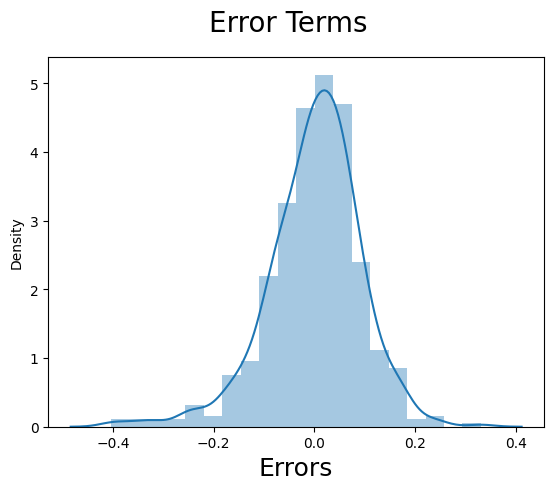

In [96]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

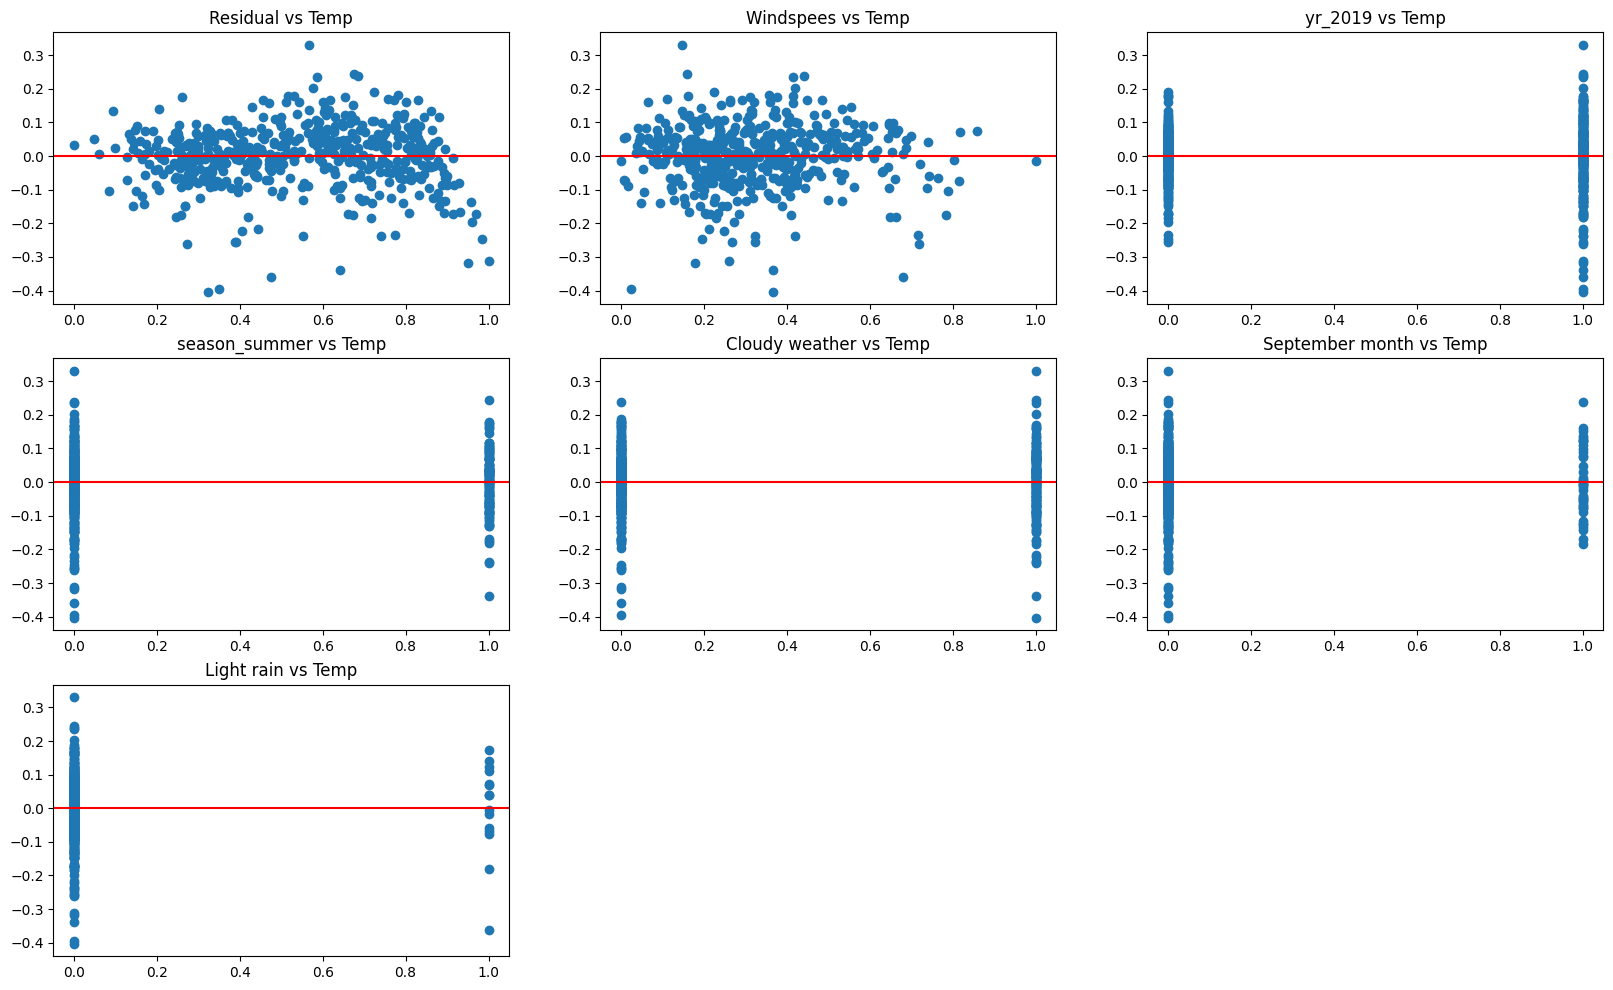

In [97]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# <b style='color:red;'> Prediction on Test setup: </b>

In [102]:
#  Transform the numerical variables 
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [103]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [104]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [105]:
X_test_m5 = X_test_m5.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

In [106]:
# Making predictions using the fourth model
y_pred_m5 = lr_19.predict(X_test_m5)

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
r_squared = r2_score(y_test, y_pred_m5)
r_squared

0.7907818070220924

Text(0, 0.5, 'y_pred')

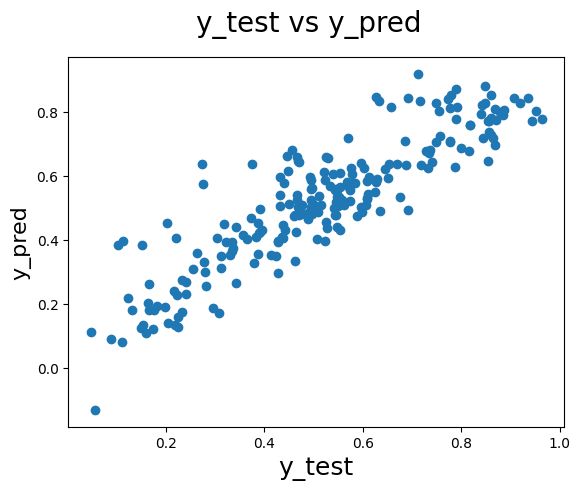

In [109]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Final Equation


We can see that the equation of our best fitted line is:

<b style='color:green;'>$ y = 0.1209 + 0.5527  \times  temp -0.1552 \times windspeed + 0.2332 \times Year2019 + 0.0894 \times summer + 1.48 \times cloudy+ 0.1281 \times winter + 0.0978 \times sept -0.2785 \times light-rain $r</b>
